# **Power Transformer**
* #### Box Cox Transformer <br><br>
  ![ytss](assets/BoxCoxTransformer.png)
  **limited to only n>0 numbers... neither 0s nor -ve's.**<br><br>
* #### Yeo Johnson Transformer <br><br>
  ![ytss](assets/yeoJohnsonTransformer.png)
  **solved the limitations of Box Cox Transformer**


## Code:


In [3]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.preprocessing import PowerTransformer

from sklearn.metrics import r2_score

In [5]:
df = pd.read_csv('assets/concrete_data.csv')

In [6]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [8]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [11]:
X = df.drop("Strength",axis=1)
Y = df['Strength']

In [12]:
# Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [13]:
# Regression without any transformation
lr = LinearRegression()

lr.fit(X_train,y_train)

y_pred = lr.predict(X_test)

r2_score(y_test,y_pred)


0.6275531792314851

In [15]:
# cross checking with cross_val

np.mean(cross_val_score(lr,X,Y,scoring="r2"))

np.float64(0.46099404916628667)

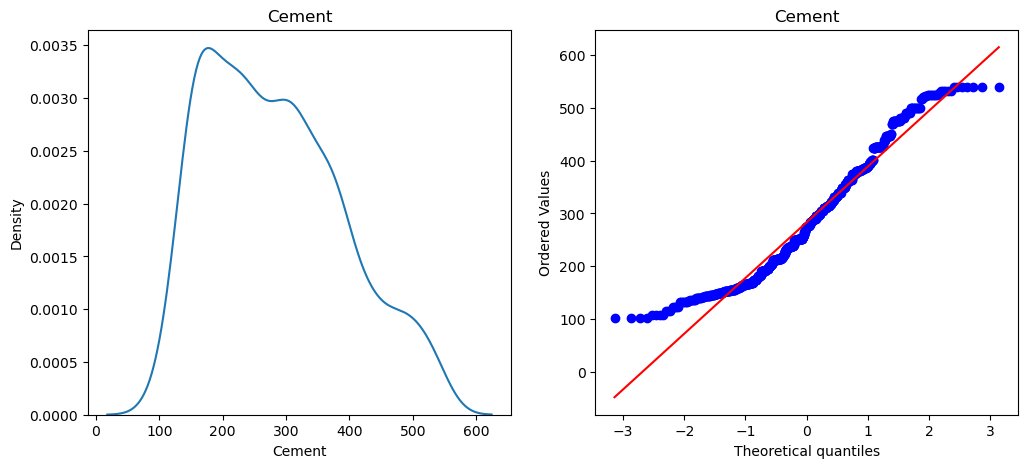

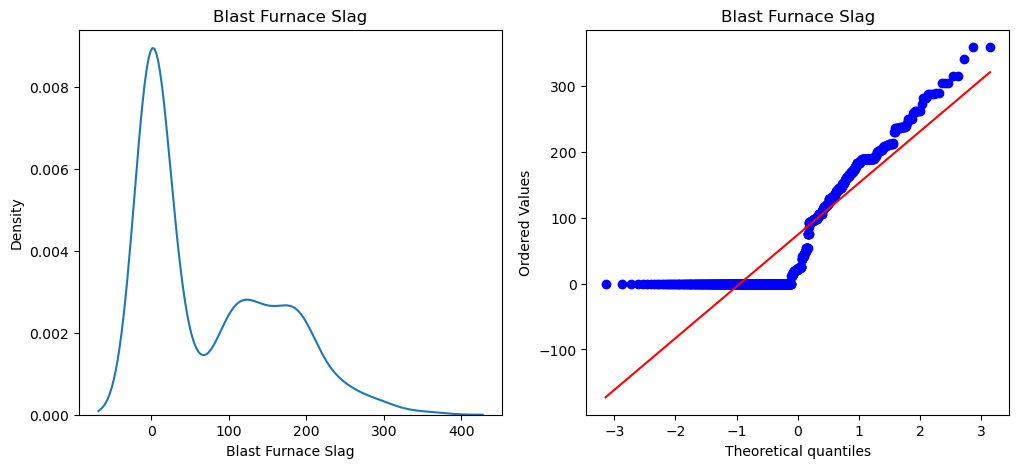

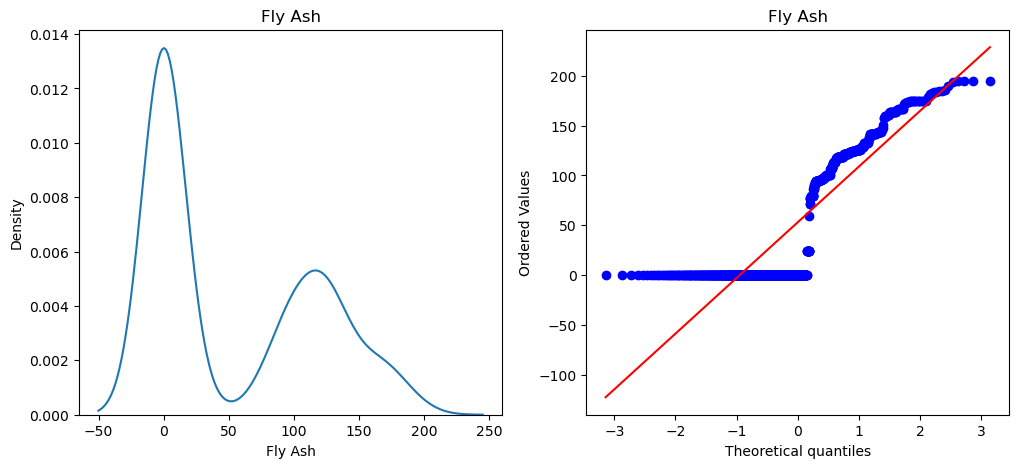

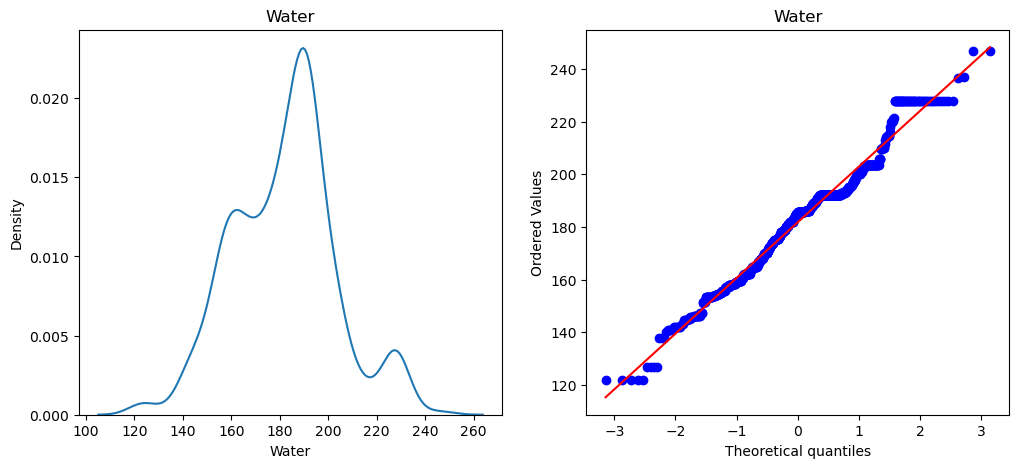

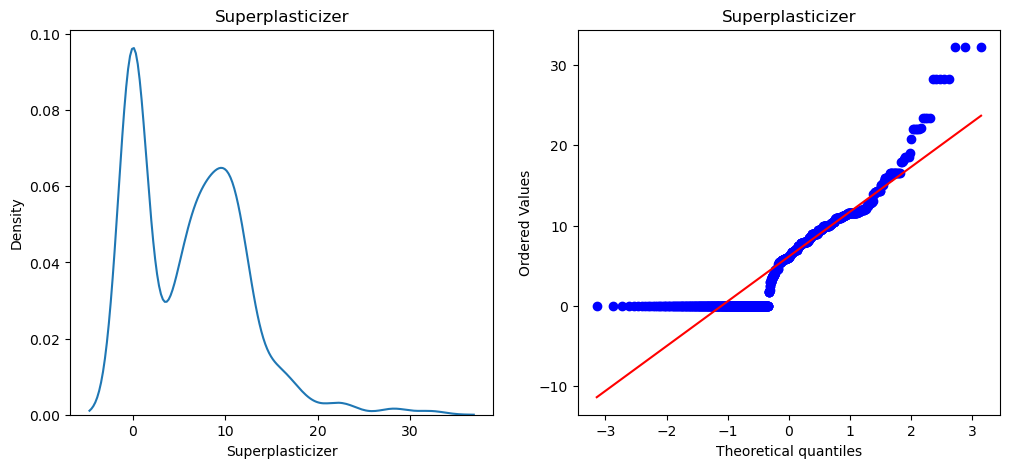

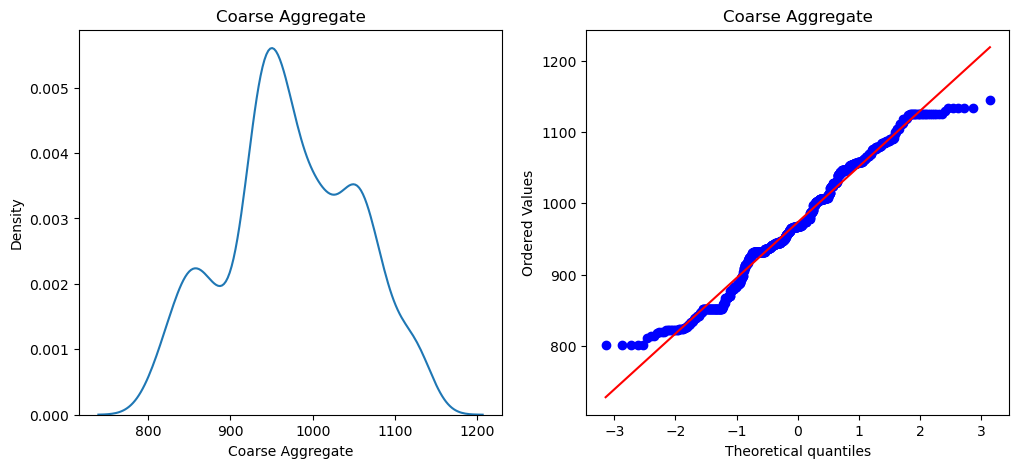

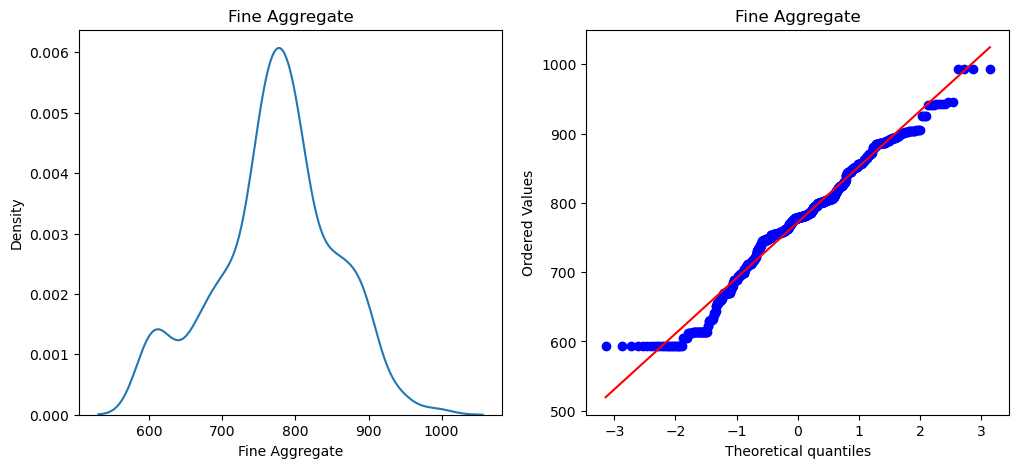

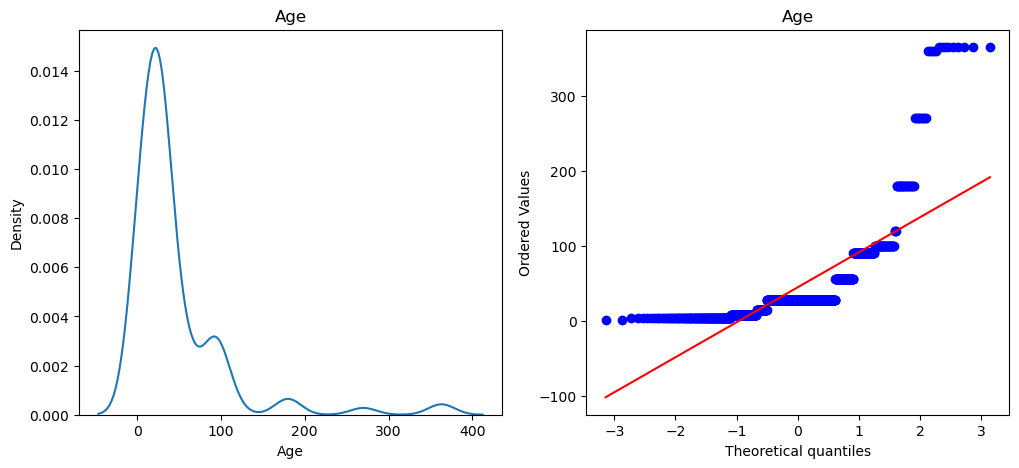

In [17]:
# Time to visualize the original columns one by one with Kde and QQ plots
for col in X_train.columns:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(f"{col}")
    
    plt.subplot(122)
    stats.probplot(X_train[col],plot=plt)
    plt.title(f"{col}") 
    plt.show()

In [36]:
p_trf = PowerTransformer(method='box-cox')

X_train_transformed = p_trf.fit_transform(X_train+0.0000001)# +0.0000001 because have to avoid 0.
X_test_transformed = p_trf.transform(X_test+0.0000001)

pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':p_trf.lambdas_})# optimal values of lambda that brought the columns closer to Normal Distribution.

,cols,box_cox_lambdas
0,Cement,0.177025
1,Blast Furnace Slag,0.022767
2,Fly Ash,-0.034635
3,Water,0.772682
4,Superplasticizer,0.087141
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066631


In [37]:
X_test_transformed

array([[-0.00705302,  0.92009037, -0.88724442, ..., -0.53233105,
        -1.24826616,  2.5105898 ],
       [ 0.81314484,  0.98153908, -0.88724442, ..., -0.37154113,
        -0.24314629, -1.03100821],
       [ 1.01191739,  0.98153908, -0.88724442, ..., -0.37154113,
        -0.24314629,  0.1060097 ],
       ...,
       [ 0.18360056,  0.98900885, -0.88724442, ...,  0.39056311,
         0.35877623, -1.03100821],
       [ 1.24470596,  0.72494984,  1.13640769, ..., -1.91272789,
        -0.3140622 ,  0.71513747],
       [ 0.63112528, -1.08630996, -0.88724442, ..., -0.07582066,
         0.06991836,  1.14860237]])

In [39]:
# now we got tranformed X_train and X_test lets apply LinearRegression again
lr= LinearRegression()
lr.fit(X_train_transformed,y_train)

y_pred2 = lr.predict(X_test_transformed)
r2_score(y_test,y_pred2)

0.8042534513415571

In [40]:
# Using Cross_Val Score on transformed X
p_trf = PowerTransformer(method='box-cox')
X_transformed = p_trf.fit_transform(X+0.0000001)

np.mean(cross_val_score(lr,X_transformed,Y,scoring='r2'))


# So we see improvement in both without cross_val and with cross_val after tranforming the data

np.float64(0.6658537952683778)

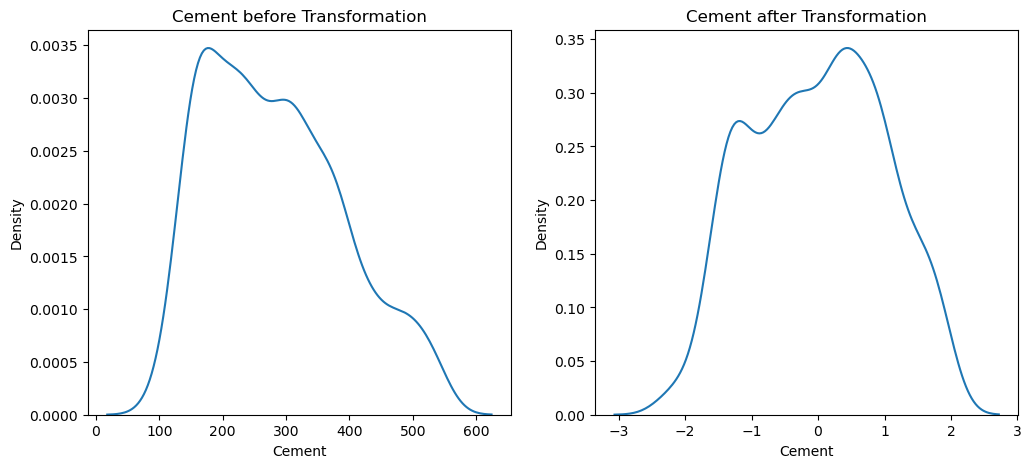

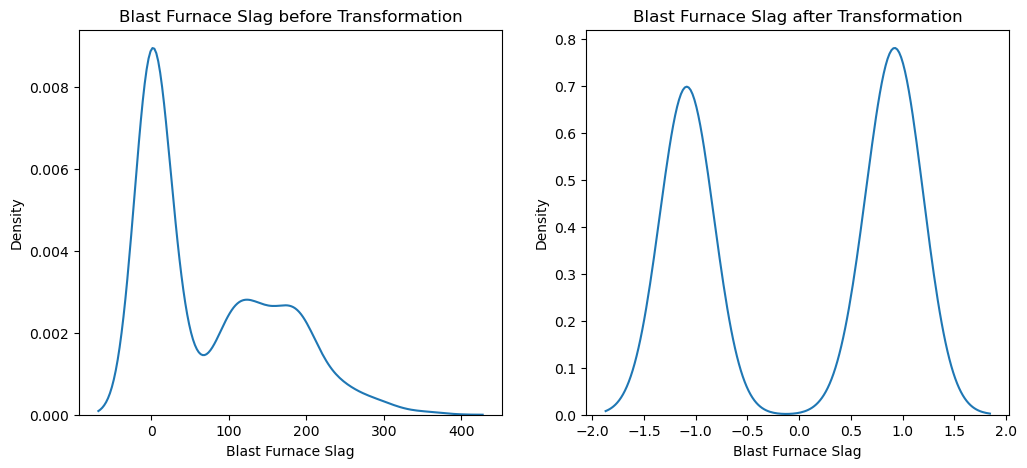

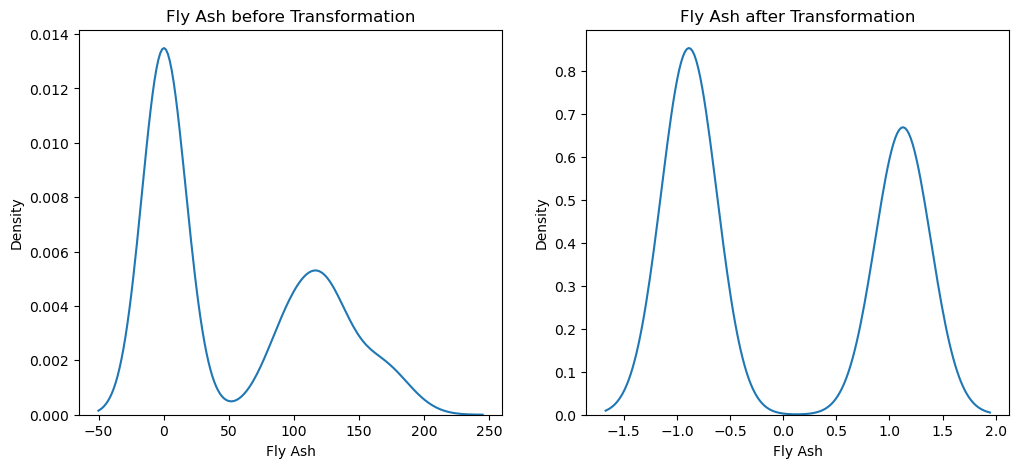

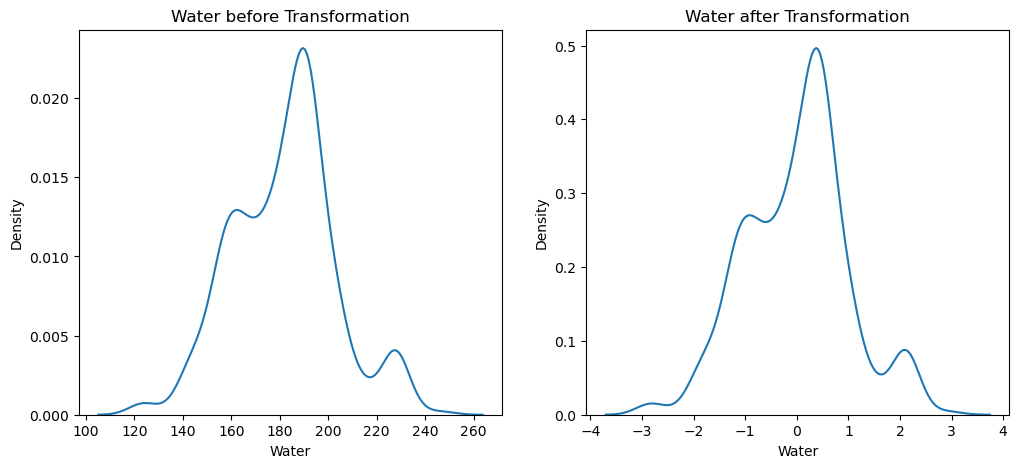

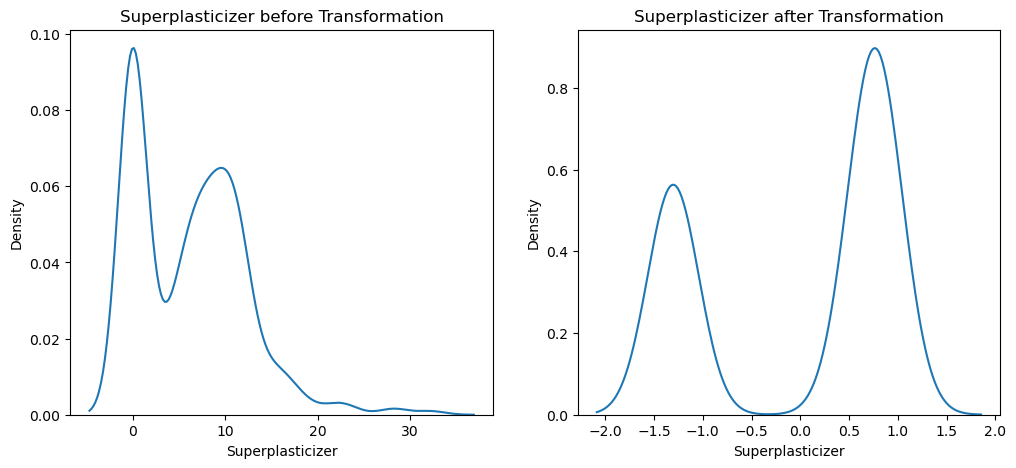

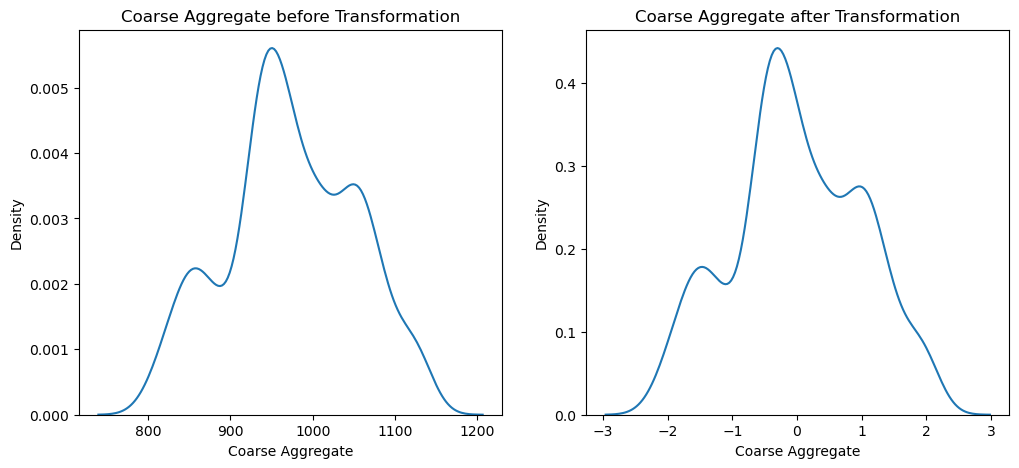

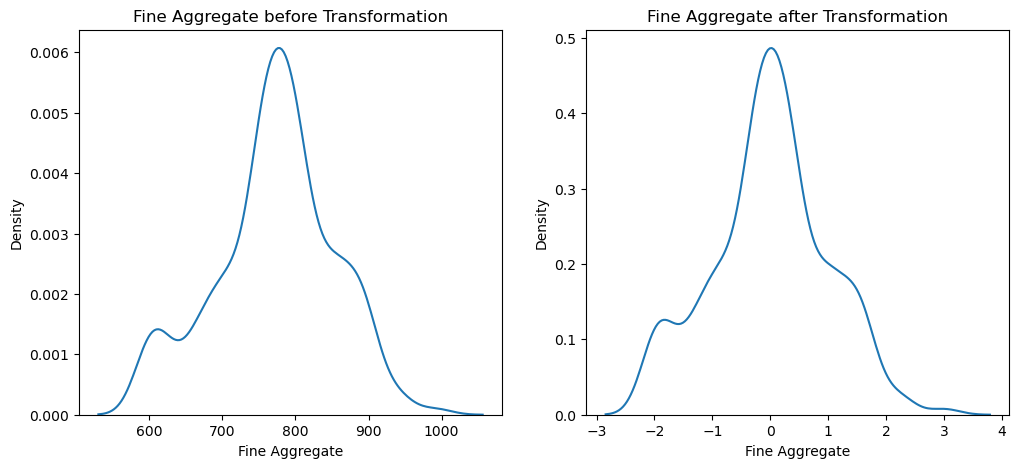

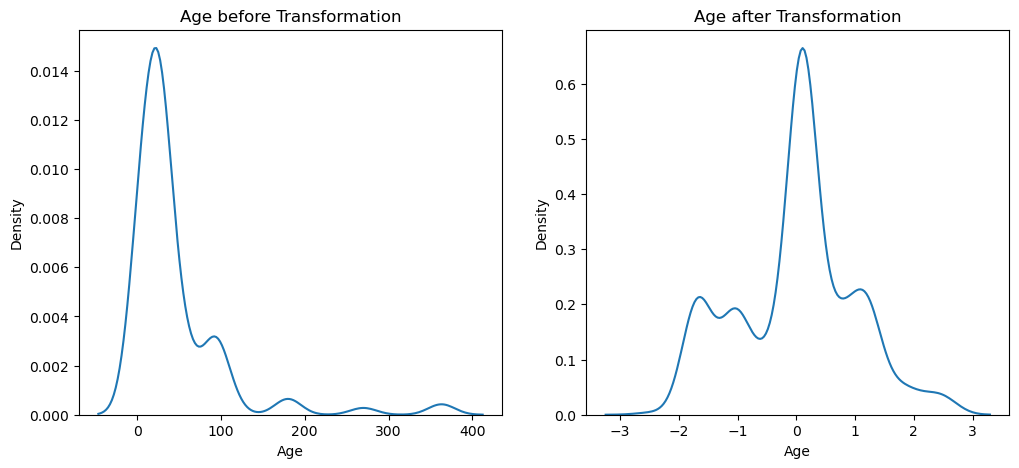

In [45]:
# Now let's have a look at the transformed data vs un-transformed data
X_train_transformed_pd = pd.DataFrame(X_train_transformed,columns = X_train.columns)
for col in X_train_transformed_pd:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(f"{col} before Transformation")

    plt.subplot(122)
    sns.kdeplot(X_train_transformed_pd[col])
    plt.title(f"{col} after Transformation")

    plt.show()

In [54]:
# Applying Yeo-Johnson

p_trf2 = PowerTransformer() #default is yeo-johnson
X_train_transformed2 = p_trf2.fit_transform(X_train)
X_test_transformed2 = p_trf2.transform(X_test)

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambda':p_trf2.lambdas_})

,cols,Yeo_Johnson_lambda
0,Cement,0.174348
1,Blast Furnace Slag,0.015715
2,Fly Ash,-0.161447
3,Water,0.771307
4,Superplasticizer,0.253935
5,Coarse Aggregate,1.130050
6,Fine Aggregate,1.783100
7,Age,0.019885


In [55]:
lr2 = LinearRegression()

lr2.fit(X_train_transformed2,y_train)

y_pred2 = lr2.predict(X_test_transformed2)

r2_score(y_test,y_pred2)

0.8161906513339305

In [53]:
# cross_val_score

pt = PowerTransformer()
X_transformed = pt.fit_transform(X)
lr = LinearRegression()

np.mean(cross_val_score(lr,X_transformed,Y,scoring='r2'))

np.float64(0.6834625134285744)

In [66]:
# Now let's have a look at the transformed data vs un-transformed data
X_train_transformed_pd2 = pd.DataFrame(X_train_transformed2,columns = X_train.columns)

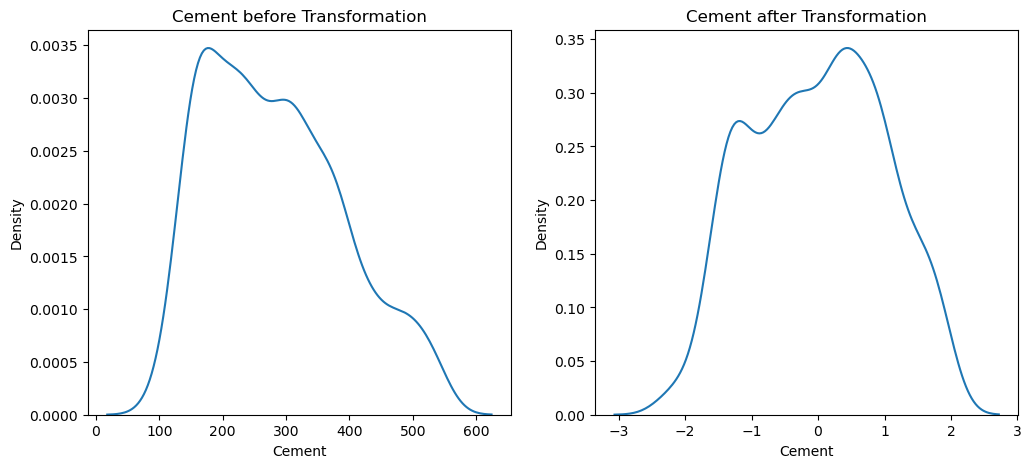

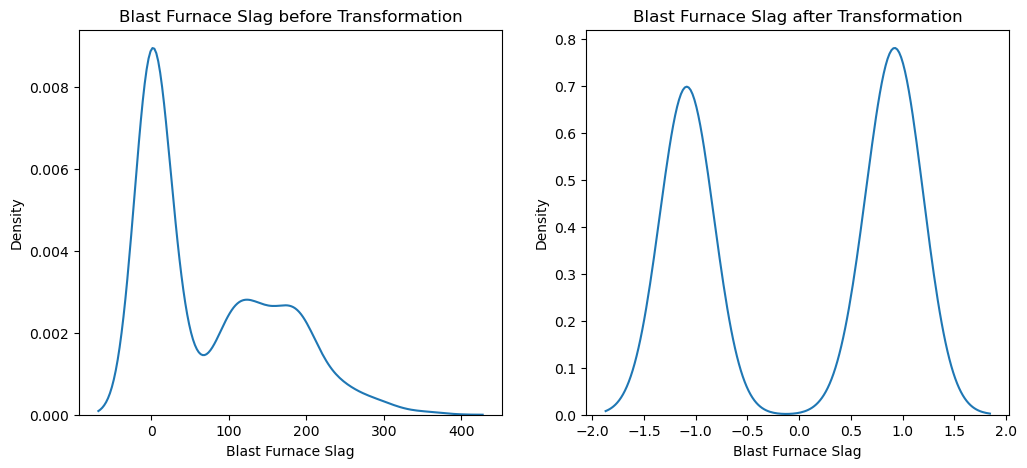

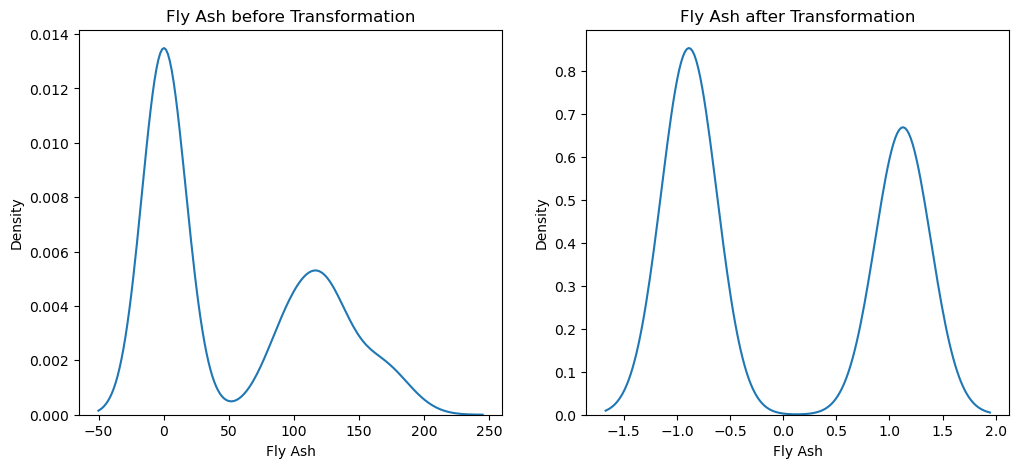

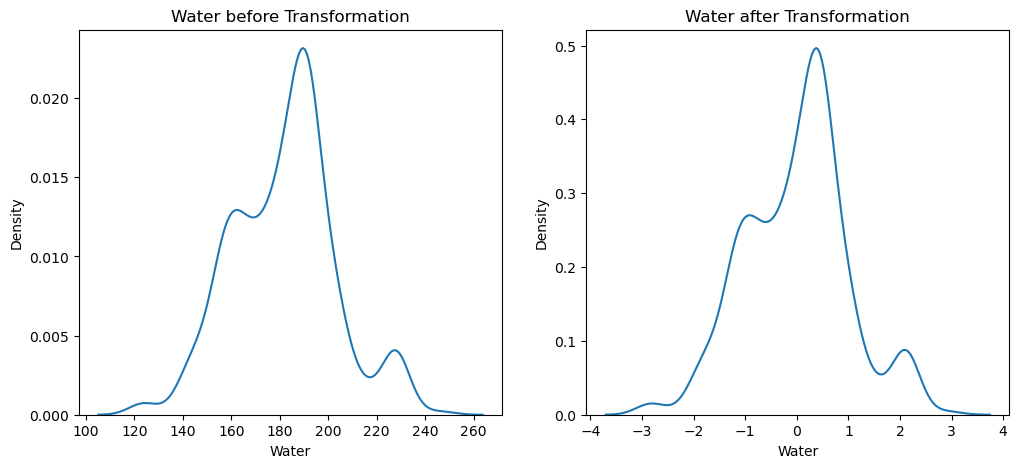

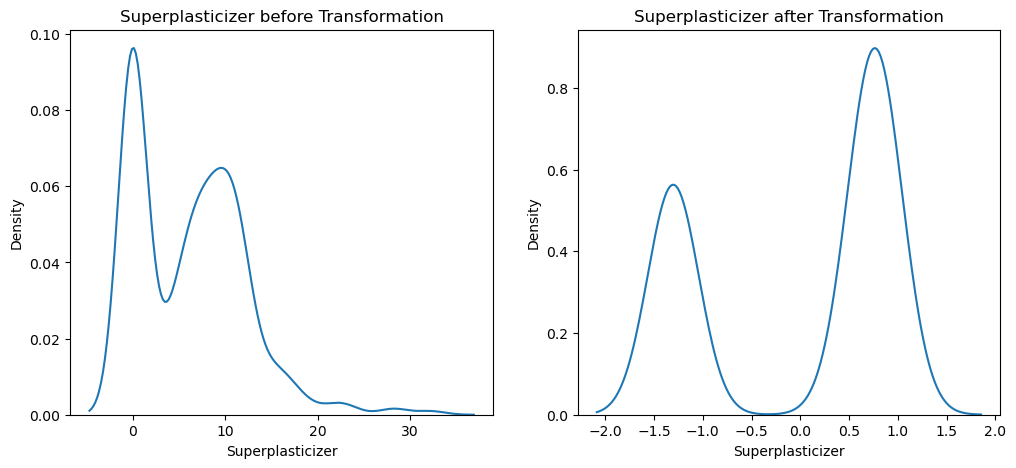

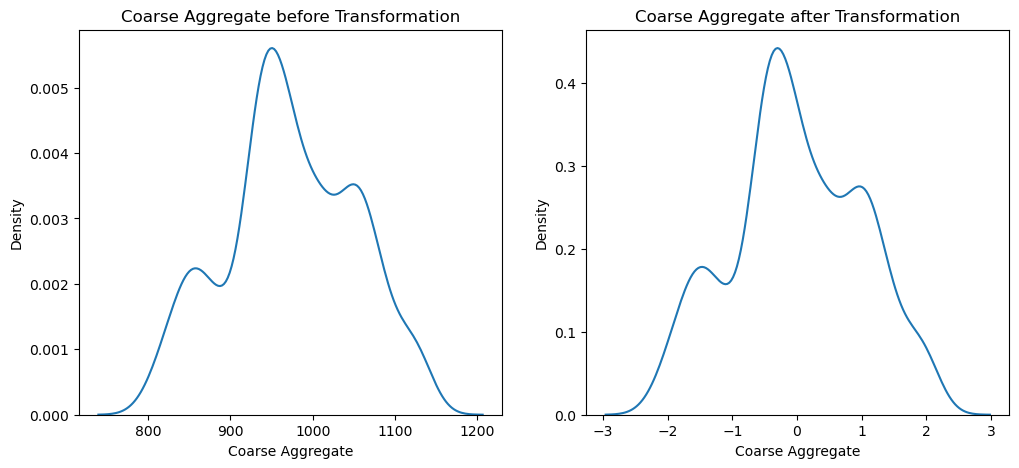

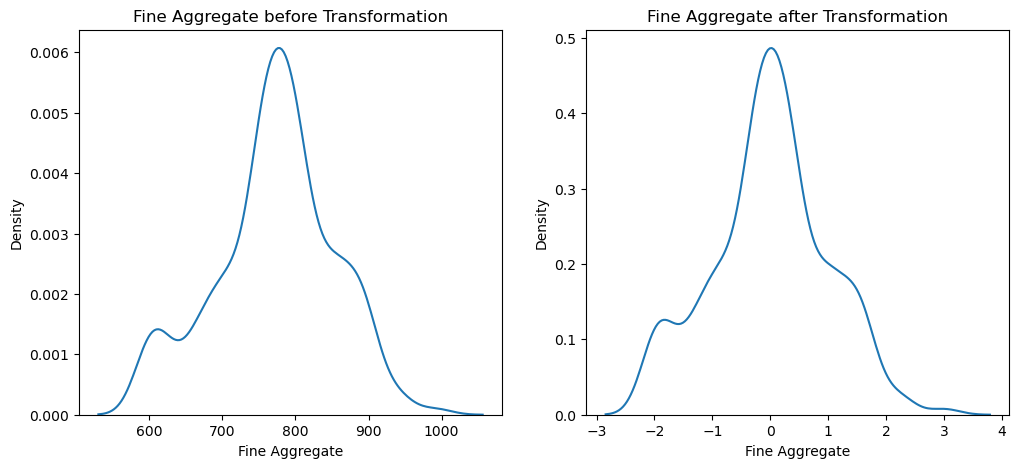

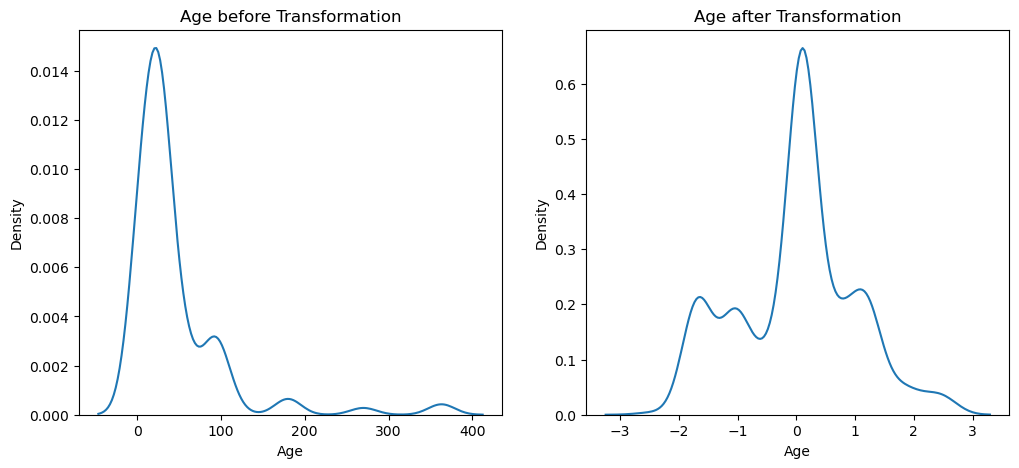

In [67]:

for col in X_train_transformed_pd2:
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    sns.kdeplot(X_train[col])
    plt.title(f"{col} before Transformation")

    plt.subplot(122)
    sns.kdeplot(X_train_transformed_pd[col])
    plt.title(f"{col} after Transformation")

    plt.show()

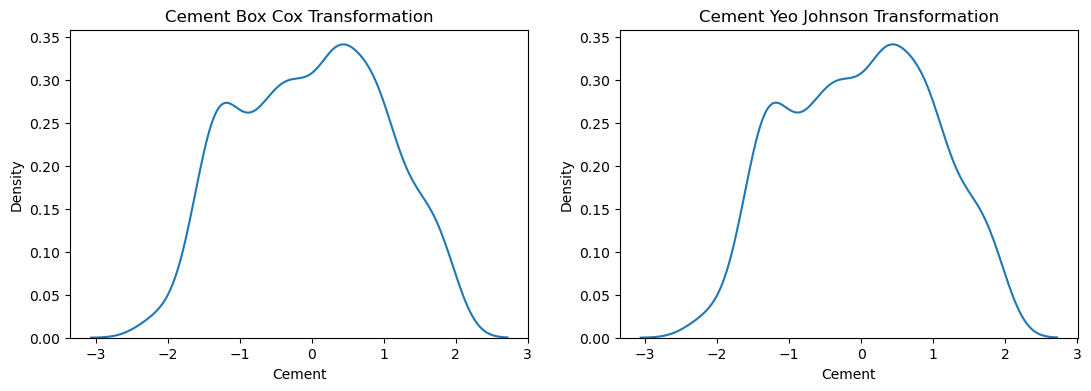

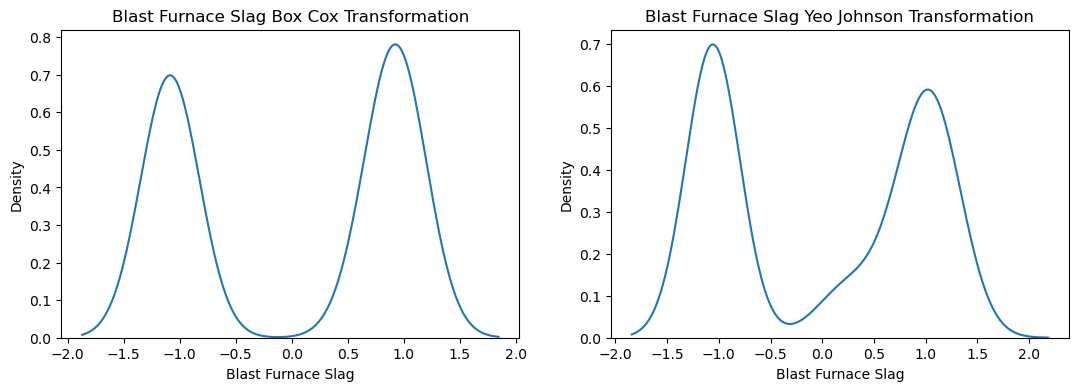

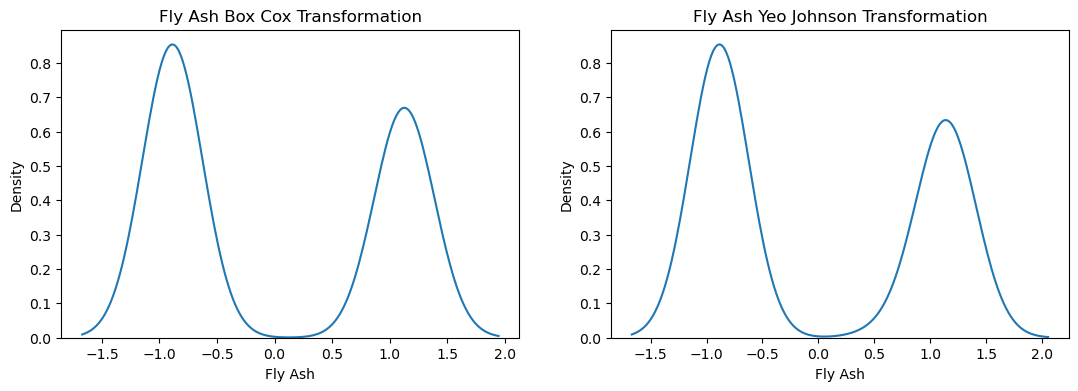

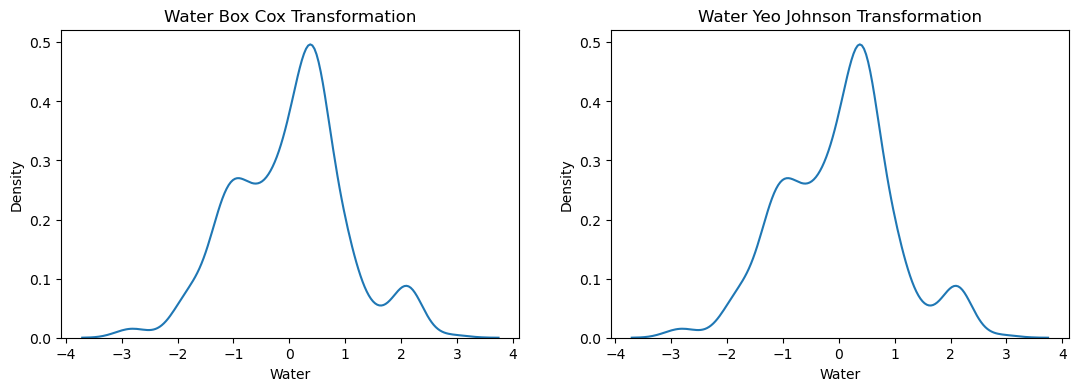

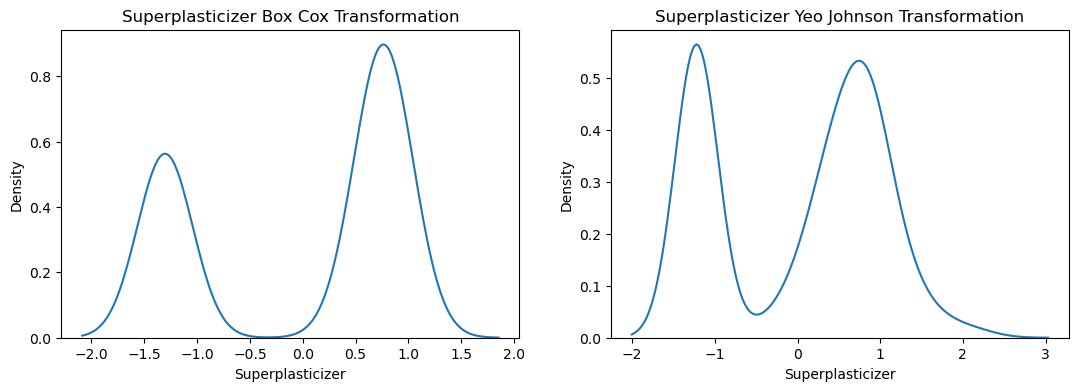

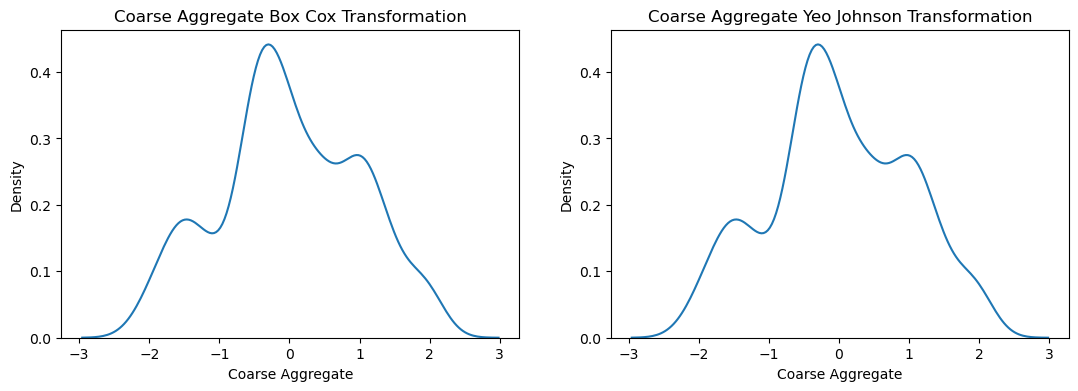

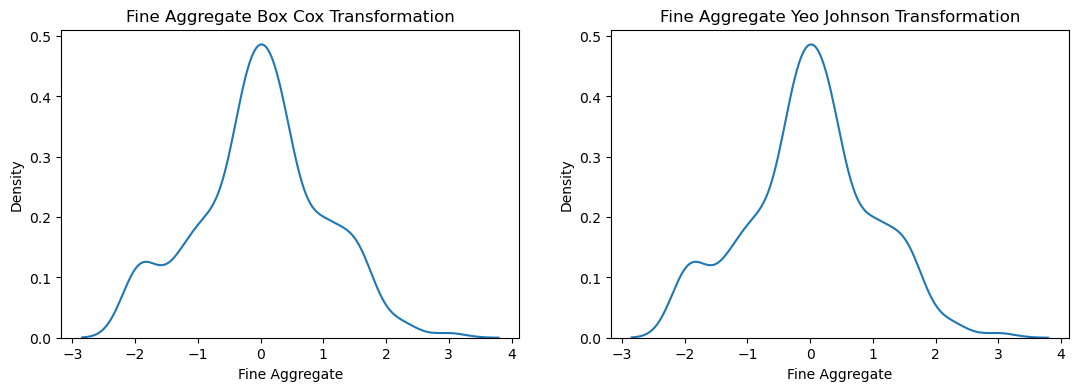

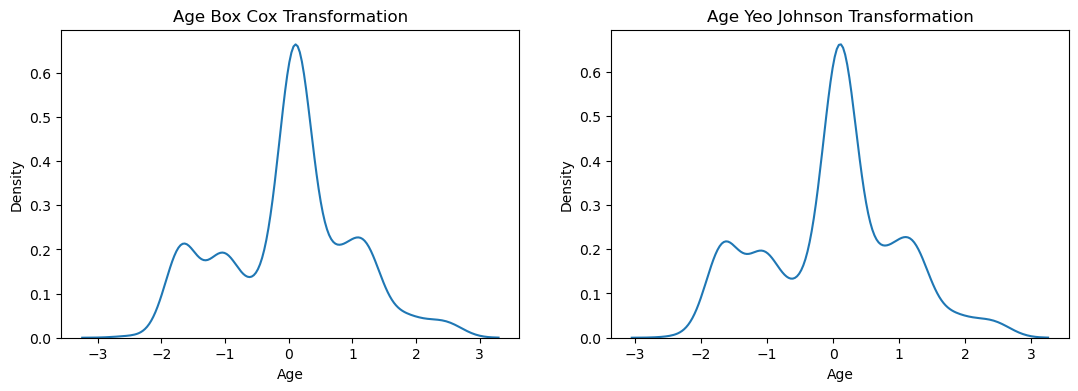

In [69]:
# kde-plots comparison of box-cox transformed data and yeo-johnson tranformed data
for col in X_train_transformed2_pd:
    plt.figure(figsize=(13,4))
    plt.subplot(121)
    sns.kdeplot(X_train_transformed_pd[col])
    plt.title(f"{col} Box Cox Transformation")

    plt.subplot(122)
    sns.kdeplot(X_train_transformed_pd2[col])
    plt.title(f"{col} Yeo Johnson Transformation")

    plt.show()

In [70]:
# lambda value difference for both boxcox and yeojohnson transformation
pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':p_trf.lambdas_,'yeo_johnson_lambdas':p_trf2.lambdas_})

,cols,box_cox_lambdas,yeo_johnson_lambdas
0,Cement,0.172271,0.174348
1,Blast Furnace Slag,0.022924,0.015715
2,Fly Ash,-0.028797,-0.161447
3,Water,0.809568,0.771307
4,Superplasticizer,0.087911,0.253935
5,Coarse Aggregate,1.129167,1.130050
6,Fine Aggregate,1.829625,1.783100
7,Age,0.048975,0.019885
